In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
from cooccurrence import *
from glob import glob
from time import time
import helper
import sys
import networkx as nx
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

	are,feel,not,right,sents,some,this,will
are	0   0   0   0   6   0   1   0  
feel	0   0   1   1   1   1   0   1  
not	0   1   0   1   1   1   0   1  
right	0   1   1   0   1   1   0   1  
sents	6   1   1   1   4   1   1   1  
some	0   1   1   1   1   0   0   1  
this	1   0   0   0   1   0   0   0  
will	0   1   1   1   1   1   0   0  



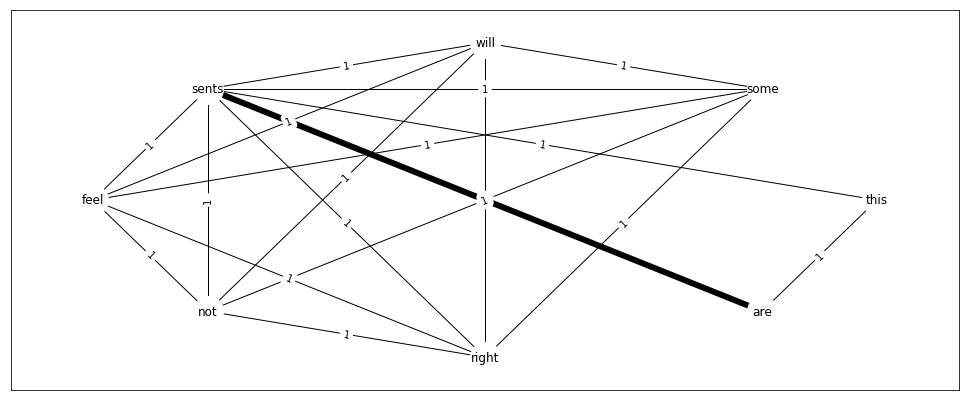

In [68]:
text = 'This are sents. sents are sents sents. Some sents will not feel right. sents are sents.'
# http://www.nltk.org/howto/collocations.html

word2id, id2word, mat = get_coocurrence_matrix(text, window_size = 5, only_forward_window = False, ignore_sentence_bounds = False)
print_cooccurrence_matrix(id2word, mat)
print()
fig, ax = plt.subplots(1, 1, figsize = (17, 7))
plot_cooccurrence_matrix(id2word, mat, ax = ax)
plt.show()

In [67]:
TEXT_DIR = '../falke/code/data/ng20/train/'
WINDOW_SIZE = 5

times = []
files = glob(TEXT_DIR + '*/*.txt')
files = files[:1000]
mats = []

start = time()
file_data = []
for file in files:
    with open(file) as f:
        file_data.append((file, f.read()))

def process(filename, text):
    return (filename, get_coocurrence_matrix(text, window_size = WINDOW_SIZE, only_forward_window = False, ignore_sentence_bounds = False))

mats = Parallel(n_jobs=4)(delayed(process)(*d) for d in file_data)
print(len(mats), mats[0])
print('(total) Time needed: {:.0f}s for {} elements'.format(time() - start, len(files)))

1000 ('../falke/code/data/ng20/train/alt.atheism_0000/0.txt', ({'at': 2, 'that': 15, 'compartmentalizing': 6, 'got': 8, 'a': 0, 'is': 10, 'who': 17, 'co-opted': 5, 'irrationality': 9, 'people': 12, 'by': 4, 'their': 16, 'cult': 7, 'or': 11, 'peter': 13, 'religion': 14, 'are': 1, 'better': 3}, {0: 'a', 1: 'are', 2: 'at', 3: 'better', 4: 'by', 5: 'co-opted', 6: 'compartmentalizing', 7: 'cult', 8: 'got', 9: 'irrationality', 10: 'is', 11: 'or', 12: 'people', 13: 'peter', 14: 'religion', 15: 'that', 16: 'their', 17: 'who'}, <18x18 sparse matrix of type '<class 'numpy.int8'>'
	with 139 stored elements in LInked List format>))
(total) Time needed: 21s for 1000 elements


In [ ]:
if False:
    for idx, (filename, text) in helper.log_progress(list(enumerate(file_data)), every = 10):#[0:100]:
        if idx % 10 == 0 and idx != 0:
            remaining = len(file_data) - idx
            time_needed = time() - start
            time_per_element = time_needed / idx
            time_remaining = remaining * time_per_element
            sys.stdout.write("\r" + 'ETA: {:<.0f}s'.format(time_remaining))
            sys.stdout.flush()
            t = time()
        mats.append((filename, get_coocurrence_matrix(text, window_size = 5, only_forward_window = True, ignore_sentence_bounds = False)))
        times.append(time() - t)
    print('')
    print('(total) Time needed: {:.0f}s'.format(time() - start))
    print('(co-occurrence) Time needed for {} iterations: {:.0f}s'.format(len(times), sum(times)))
#for file, (word2id, id2word, mat) in mats:
#    print(':)')